# Цель лабораторной работы

Изучение ансамблей моделей машинного обучения

# Задание

1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите две ансамблевые модели. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

# Ход выполнения лабораторной работы

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

%matplotlib inline

# Устанавливаем тип графиков
sns.set(style="ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
pd.set_option("display.width", 70)


# Загружаем данные
data = pd.read_csv('Wine1.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [49]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [50]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
target                  0
dtype: int64

In [51]:
data.shape

(1599, 13)

In [14]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates',
       'alcohol', 'quality', 'target'],
      dtype='object')

In [15]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
target                  float64
dtype: object

Набор данных не содержит пропусков

In [55]:
# Убедимся, что целевой признак
# для задачи бинарной классификации содержит только 0 и 1
data['target'].unique()

array([0, 1])

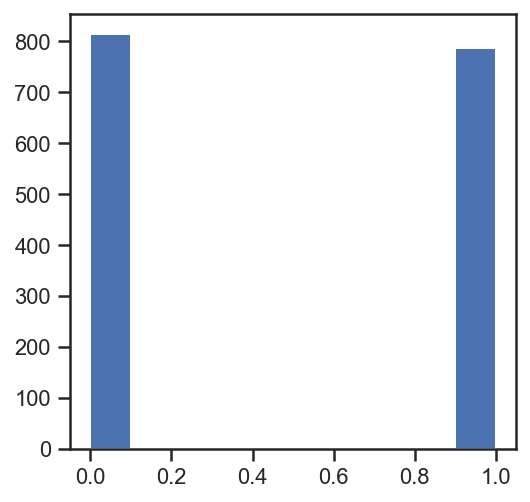

In [52]:
# Оценим дисбаланс классов для Occupancy
fig, ax = plt.subplots(figsize=(4,4)) 
plt.hist(data['target'])
plt.show()

In [53]:
data['target'].value_counts()

0    813
1    786
Name: target, dtype: int64

In [54]:
# посчитаем дисбаланс классов
total = data.shape[0]
class_1, class_0 = data['target'].value_counts()
print('Класс 0 составляет {}%, а класс 1 составляет {}%.'
      .format(round(class_0 / total, 2)*100, round(class_1 / total, 2)*100))

Класс 0 составляет 49.0%, а класс 1 составляет 51.0%.


Дисбаланса классов практически нет

#### Проведем масштабирование данных 

In [56]:
# Числовые колонки для масштабирования
scale_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

In [57]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(data[scale_cols])

In [58]:
# Добавим масштабированные данные в набор данных
for i in range(len(scale_cols)):
    col = scale_cols[i]
    new_col_name = col + '_scaled'
    data[new_col_name] = sc1_data[:,i]

In [59]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,...,citric acid_scaled,residual sugar_scaled,chlorides_scaled,free sulfur dioxide_scaled,total sulfur dioxide_scaled,density_scaled,pH_scaled,sulphates_scaled,alcohol_scaled,quality_scaled
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,...,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,...,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,...,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,...,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


In [60]:
corr_cols_1 = scale_cols + ['target']
corr_cols_1

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'target']

In [61]:
scale_cols_postfix = [x+'_scaled' for x in scale_cols]
corr_cols_2 = scale_cols_postfix + ['target']
corr_cols_2

['fixed acidity_scaled',
 'volatile acidity_scaled',
 'citric acid_scaled',
 'residual sugar_scaled',
 'chlorides_scaled',
 'free sulfur dioxide_scaled',
 'total sulfur dioxide_scaled',
 'density_scaled',
 'pH_scaled',
 'sulphates_scaled',
 'alcohol_scaled',
 'quality_scaled',
 'target']

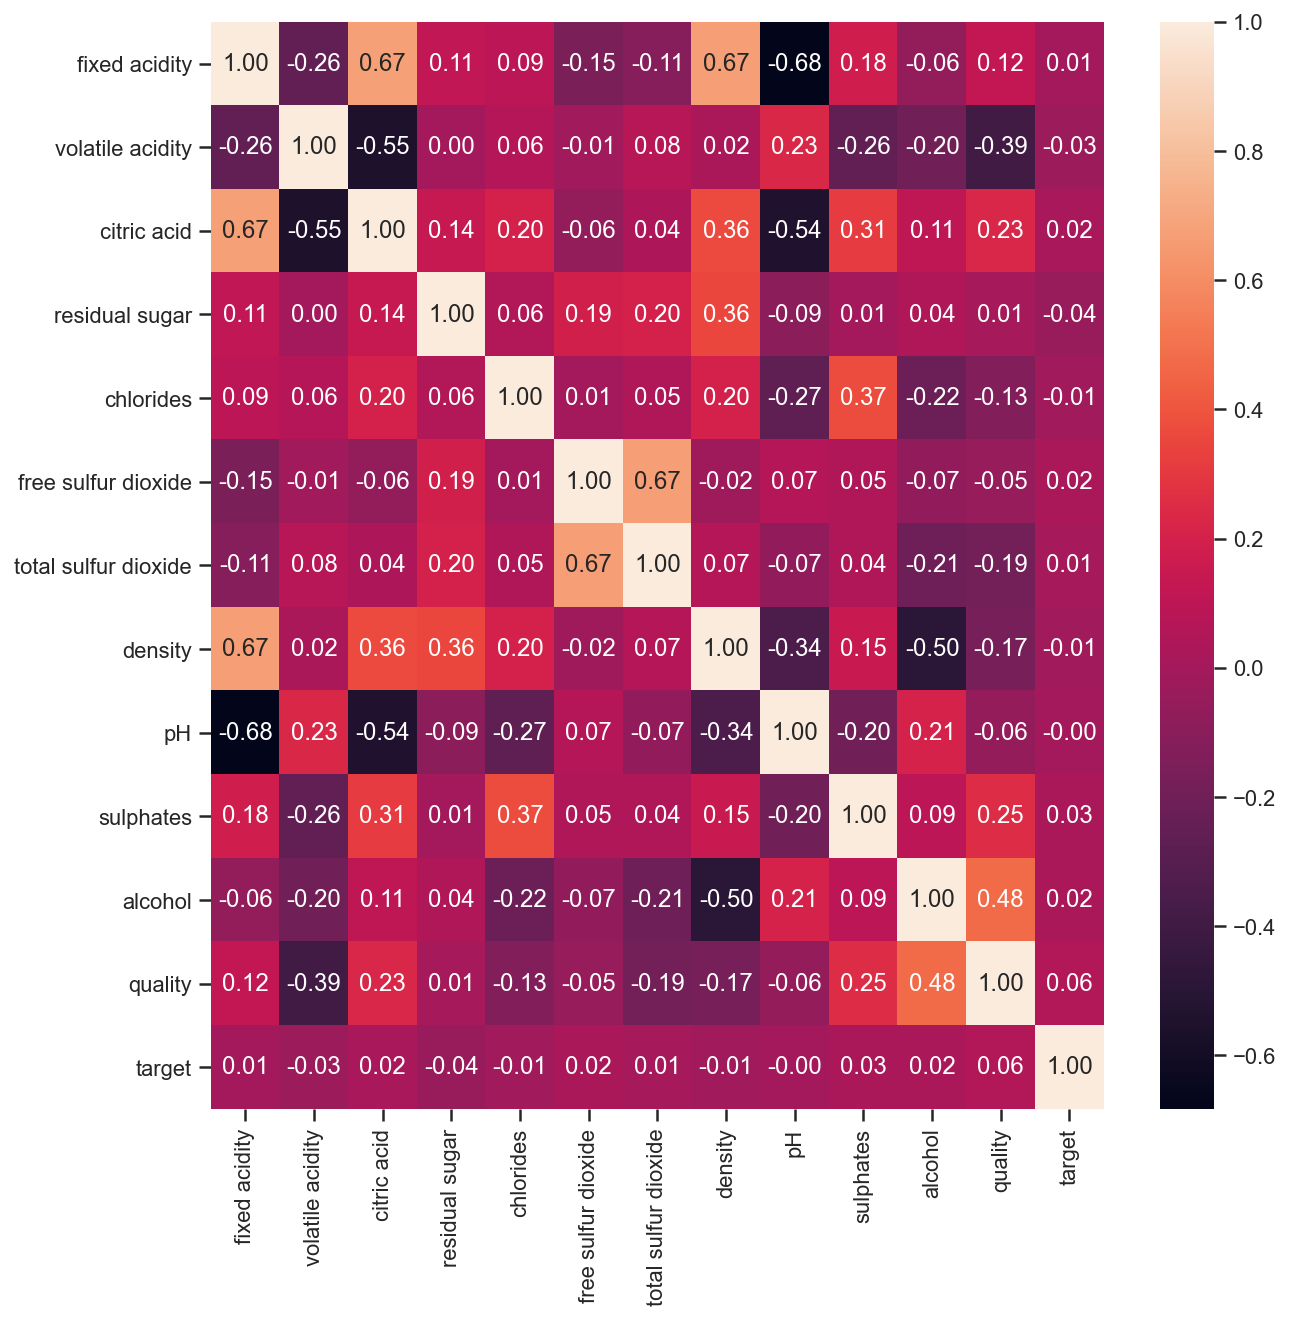

In [62]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_1].corr(), annot=True, fmt='.2f')

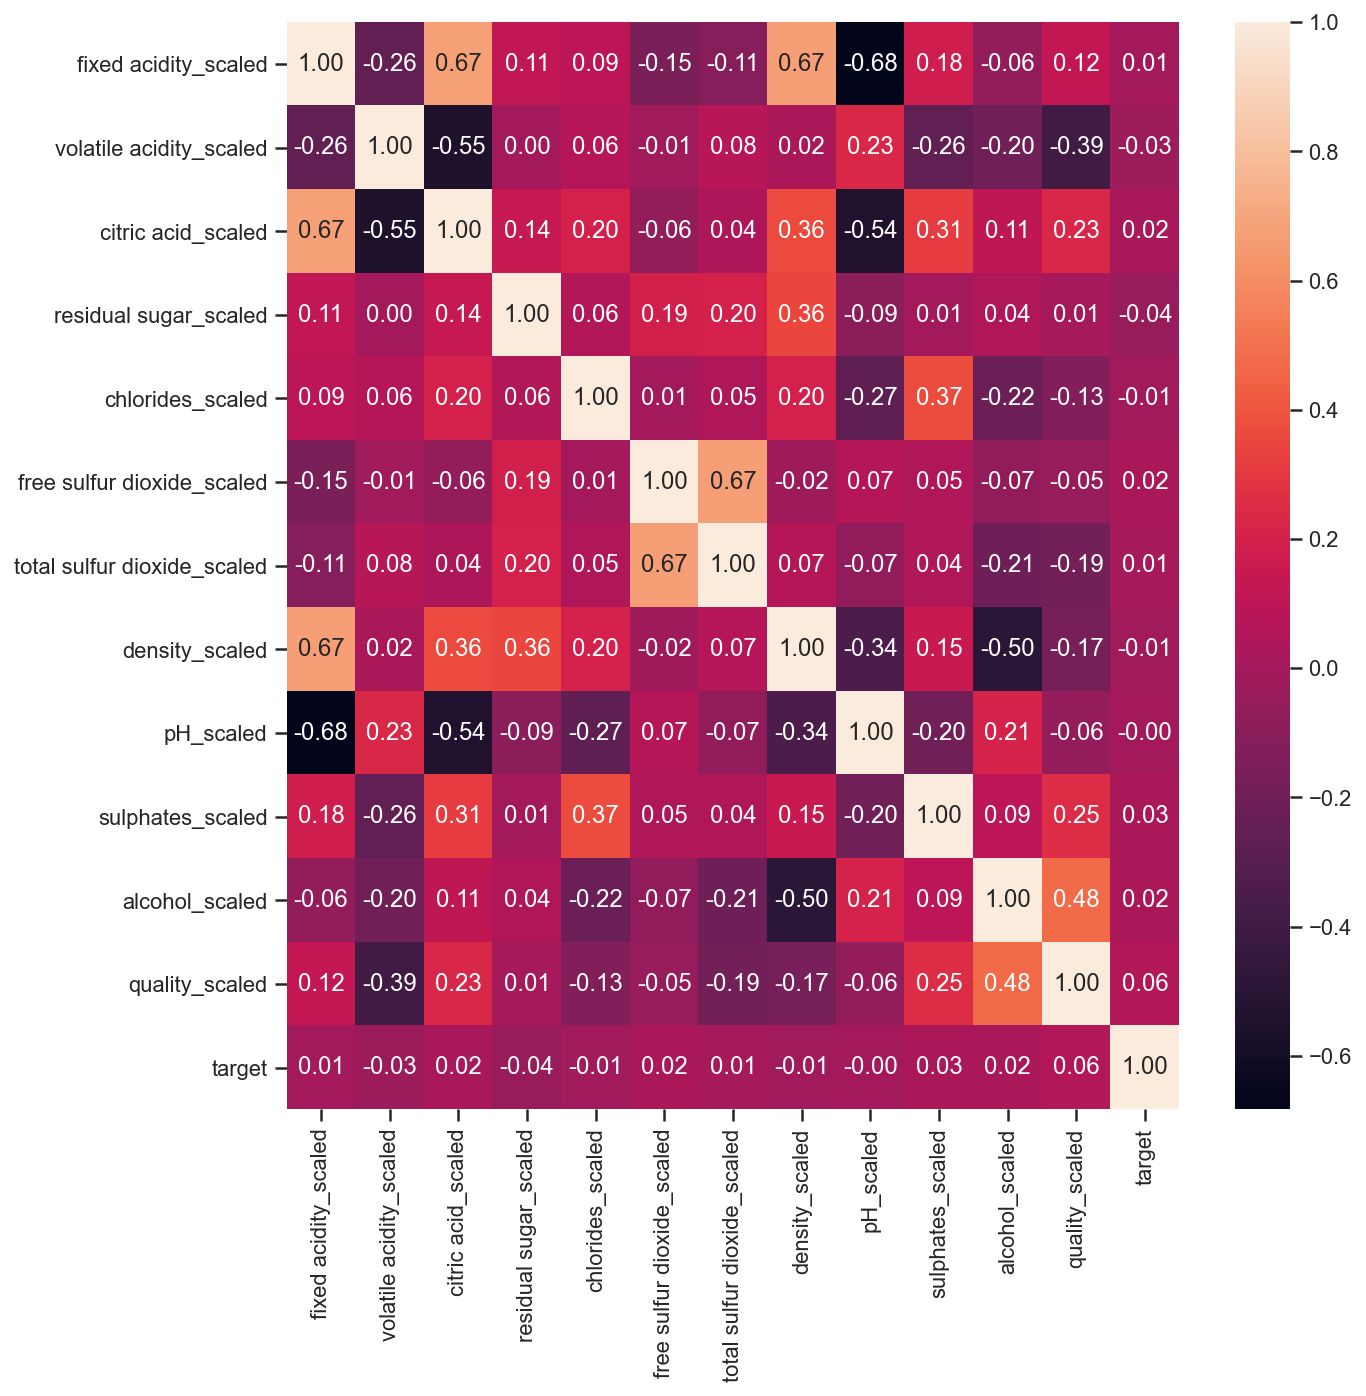

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[corr_cols_2].corr(), annot=True, fmt='.2f')

На основе корреляционной матрицы можно сделать следующие выводы:

* Корреляционные матрицы для исходных и масштабированных данных совпадают;
* Колонку trestbps, fbs, chol можно не включать, так как имеют очень слабую корреляцию с целевым признаком.

In [64]:
# Признаки для задачи классификации
class_cols = ['fixed acidity_scaled', 'volatile acidity_scaled', 'citric acid_scaled', 'residual sugar_scaled', 'chlorides_scaled', 
              'free sulfur dioxide_scaled', 'total sulfur dioxide_scaled', 'density_scaled', 'pH_scaled', 'sulphates_scaled', 'alcohol_scaled', 'quality_scaled']

In [65]:
X = data[class_cols]
y = data['target']
print(X, "\n")
print(y)

      fixed acidity_scaled  volatile acidity_scaled  \
0                 0.247788                 0.397260   
1                 0.283186                 0.520548   
2                 0.283186                 0.438356   
3                 0.584071                 0.109589   
4                 0.247788                 0.397260   
...                    ...                      ...   
1594              0.141593                 0.328767   
1595              0.115044                 0.294521   
1596              0.150442                 0.267123   
1597              0.115044                 0.359589   
1598              0.123894                 0.130137   

      citric acid_scaled  residual sugar_scaled  chlorides_scaled  \
0                   0.00               0.068493          0.106845   
1                   0.00               0.116438          0.143573   
2                   0.04               0.095890          0.133556   
3                   0.56               0.068493          0.1051

#### Разделим выборку на обучающую и тестовую

In [66]:
# С использованием метода train_test_split разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

X_train: (1199, 12)
X_test: (400, 12)
y_train: (1199,)
y_test: (400,)


In [67]:
class MetricLogger:
    
    def __init__(self):
        self.df = pd.DataFrame(
            {'metric': pd.Series([], dtype='str'),
            'alg': pd.Series([], dtype='str'),
            'value': pd.Series([], dtype='float')})

    def add(self, metric, alg, value):
      
        # Удаление значения если оно уже было ранее добавлено
        self.df.drop(self.df[(self.df['metric']==metric)&(self.df['alg']==alg)].index, inplace = True)
        # Добавление нового значения
        temp = [{'metric':metric, 'alg':alg, 'value':value}]
        self.df = self.df.append(temp, ignore_index=True)

    def get_data_for_metric(self, metric, ascending=True):
        
        temp_data = self.df[self.df['metric']==metric]
        temp_data_2 = temp_data.sort_values(by='value', ascending=ascending)
        return temp_data_2['alg'].values, temp_data_2['value'].values
    
    def plot(self, str_header, metric, ascending=True, figsize=(5, 5)):
        
        array_labels, array_metric = self.get_data_for_metric(metric, ascending)
        fig, ax1 = plt.subplots(figsize=figsize)
        pos = np.arange(len(array_metric))
        rects = ax1.barh(pos, array_metric,
                         align='center',
                         height=0.5, 
                         tick_label=array_labels)
        ax1.set_title(str_header)
        for a,b in zip(pos, array_metric):
            plt.text(0.5, a-0.05, str(round(b,3)), color='white')
        plt.show()

In [68]:
# Сохранение метрик
metricLogger = MetricLogger()

In [69]:
def test_model(model_name, model, metricLogger):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    metricLogger.add('precision', model_name, precision)
    metricLogger.add('recall', model_name, recall)
    metricLogger.add('f1', model_name, f1)
    metricLogger.add('accuracy', model_name, accuracy)
    
    print('*****************************************************')
    print(model)
    print(model_name)
    print("accuracy:", accuracy)
    print("f1_score:", f1)
    print("precision_score:", precision)
    print("recall:", recall)
    print('*****************************************************')

#### Обучим модели

Будем использовать модели: случайный лес, градиентный бустинг

In [70]:
test_model('Random forest', RandomForestClassifier(), metricLogger)
test_model('GB', GradientBoostingClassifier(), metricLogger)

*****************************************************
RandomForestClassifier()
Random forest
accuracy: 0.455
f1_score: 0.4202127659574468
precision_score: 0.4463276836158192
recall: 0.3969849246231156
*****************************************************
*****************************************************
GradientBoostingClassifier()
GB
accuracy: 0.44
f1_score: 0.4042553191489362
precision_score: 0.4293785310734463
recall: 0.38190954773869346
*****************************************************


In [71]:
# Метрики качества модели
metrics = metricLogger.df['metric'].unique()
metrics

array(['precision', 'recall', 'f1', 'accuracy'], dtype=object)

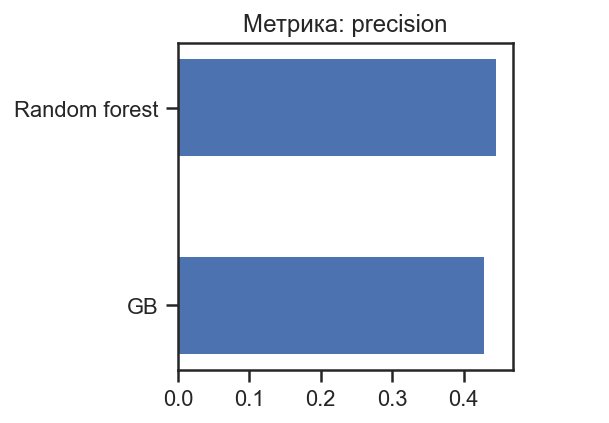

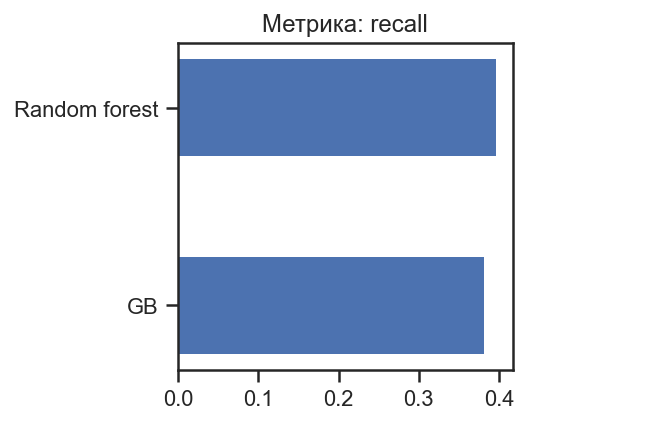

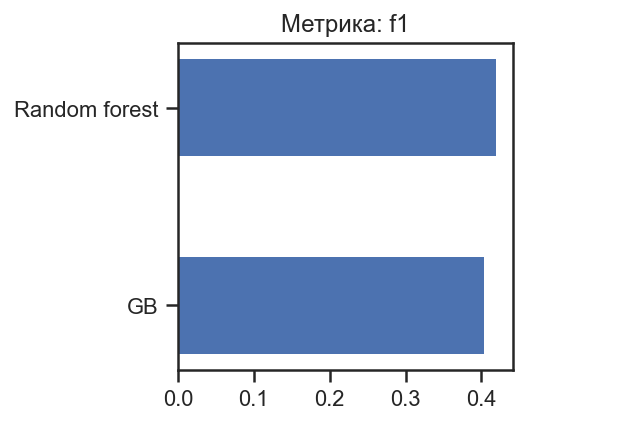

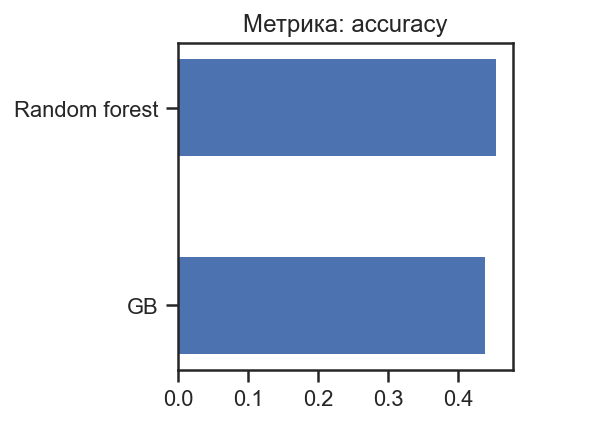

In [72]:
# Построим графики метрик качества модели
for metric in metrics:
    metricLogger.plot('Метрика: ' + metric, metric, figsize=(3, 3))

#### Вывод: на основании четырех метрик из четырех используемых, лучшей оказалась модель случайного леса.